<a href="https://colab.research.google.com/github/subai-ro/usl.projects/blob/main/Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend pandas numpy gdown


In [2]:
import gdown
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


Loading and cleaning of ESS11 - integrated file, edition 2.0

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/ESS11.csv',  sep=";", encoding='ISO-8859-1', na_values=["66", "6666", "888", "nan", "NA"])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-ea9db56602d7>:3: DtypeWarning: Columns (6,7,9,210,211,630) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/ESS11.csv',  sep=";", encoding='ISO-8859-1', na_values=["66", "6666", "888", "nan", "NA"])


In [4]:
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight', 'pspwght', 'pweight', 'anweight', 'nwspol', 'netusoft', 'netustm', 'ppltrst', 'pplfair', 'pplhlp', 'polintr', 'psppsgva', 'actrolga', 'psppipla', 'cptppola', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 'vote', 'prtvtdat', 'prtvtebe', 'prtvtchr', 'prtvtccy', 'prtvtffi', 'prtvtffr', 'prtvgde1', 'prtvgde2', 'prtvtegr', 'prtvthhu', 'prtvteis', 'prtvteie', 'prtvteit', 'prtvclt1', 'prtvclt2', 'prtvclt3', 'prtvtinl', 'prtvtcno', 'prtvtfpl', 'prtvtept', 'prtvtbrs', 'prtvtesk', 'prtvtgsi', 'prtvtges', 'prtvtdse', 'prtvthch', 'prtvtdgb', 'contplt', 'donprty', 'badge', 'sgnptit', 'pbldmna', 'bctprd', 'pstplonl', 'volunfp', 'clsprty', 'prtcleat', 'prtclebe', 'prtclbhr', 'prtclccy', 'prtclgfi', 'prtclgfr', 'prtclgde', 'prtclegr', 'prtclihu', 'prtcleis', 'prtclfie', 'prtclfit', 'prtclclt', 'prtclhnl', 'prtclcno', 'prtcljpl', 'prtclgpt', 'prtclbrs', 'prtclesk', 'prtclgsi', 'prt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df["hincfel"] = pd.to_numeric(df["hincfel"], errors="coerce")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Set 7,8,9 to missing since

7 Refusal*

8 Don't know*

9 No answer*

In [6]:
df.loc[df["hincfel"].isin([7,8,9]), "hincfel"] = np.nan

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


And recode hincfel numeric -> text

In [7]:
map_hincfel = {
    1: "Living comfortably on present income",
    2: "Coping on present income",
    3: "Difficult on present income",
    4: "Very difficult on present income"
}
df["hincfel"] = df["hincfel"].replace(map_hincfel)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
hincfel_missing_rate = df['hincfel'].isnull().mean() * 100
print(f"\nMissing rate for hincfel: {hincfel_missing_rate:.2f}%")


Missing rate for hincfel: 1.12%


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drop missing

In [9]:
df = df.dropna(subset=["hincfel"])


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Descriptions on this card comes closest to how you feel about your household's income nowadays?

Value	Category

1	Living comfortably on present income

2	Coping on present income

3	Difficult on present income

4	Very difficult on present income

7	Refusal*

8	Don't know*

9	No answer*

Countries encoding

In [10]:
valid_countries = [
    "AT","BE","HR","CY","FI","FR","DE","GR","HU","IS",
    "IE","IT","LT","NL","NO","PL","PT","RS","SK","SI",
    "ES","SE","CH","UK"
]

df = df[df["cntry"].isin(valid_countries)]
df = df.dropna(subset=["hincfel"])

print("Countries kept:", df["cntry"].unique())
print("Remaining rows:", len(df))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Countries kept: ['AT' 'BE' 'CH' 'CY' 'DE' 'ES' 'FI' 'FR' 'GR' 'HR' 'HU' 'IE' 'IS' 'IT'
 'LT' 'NL' 'NO' 'PL' 'PT' 'RS' 'SE' 'SI' 'SK']
Remaining rows: 38055


Creating balanced subsample per country (let's say, ~60%)

In [11]:
n_per_country = 1250
df_sample = (
    df
    .groupby("cntry", group_keys=True)
    .apply(
        lambda grp: grp.sample(n=n_per_country, random_state=42)
        if len(grp) > n_per_country else grp
    )
    .reset_index(drop=True)
)

print("Total rows in balanced sample:", len(df_sample))
print("Counts per country:\n", df_sample["cntry"].value_counts())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-11-0f7be718c56a>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Total rows in balanced sample: 27706
Counts per country:
 cntry
AT    1250
HU    1250
RS    1250
PT    1250
PL    1250
NO    1250
NL    1250
LT    1250
IT    1250
BE    1250
IE    1250
HR    1250
GR    1250
FR    1250
FI    1250
ES    1250
DE    1250
CH    1250
SK    1250
SI    1238
SE    1222
IS     836
CY     660
Name: count, dtype: int64


We are going to use a columns named agea, mnactic, and eisced to demonstrate association‐rule mining with a small set of straightforward demographic variables. Age, main activity (e.g. employed, unemployed, etc.), and education level are common, clear, and strongly relevant to economic well‐being—and so they make a good starting point to see patterns with hincfel. Age can relate to whether one is a student or retiree, main activity distinguishes employed from jobseeking or other statuses, and education often correlates with earning power. Thus, they provide a plausible demonstration of how different groups might feel about household income.

Discretizing age and converting columns to strings

In [12]:
df_sample.loc[df_sample["agea"] == 6666, "agea"] = np.nan
df_sample = df_sample.dropna(subset=["agea"])

df_sample["agea_bin"] = pd.cut(
    df_sample["agea"],
    bins=[0, 29, 44, 59, 74, 120],
    labels=["Age_0_29","Age_30_44","Age_45_59","Age_60_74","Age_75plus"]
)

df_sample["hincfel"] = df_sample["hincfel"].astype(str)
df_sample["mnactic"] = df_sample["mnactic"].astype(str)
df_sample["eisced"]  = df_sample["eisced"].astype(str)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(df_sample.columns)


Index(['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight',
       'pspwght', 'pweight', 'anweight',
       ...
       'inwde', 'jinws', 'jinwe', 'inwtm', 'mode', 'domain', 'prob', 'stratum',
       'psu', 'agea_bin'],
      dtype='object', length=641)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
columns_for_rules = ["hincfel", "agea_bin", "mnactic", "eisced"]
df_subset = df_sample[columns_for_rules].copy()
trans = pd.get_dummies(df_subset)

print("One-hot shape:", trans.shape)
print("One-hot columns:", trans.columns.tolist())

trans.head(5)

One-hot shape: (27224, 32)
One-hot columns: ['hincfel_Coping on present income', 'hincfel_Difficult on present income', 'hincfel_Living comfortably on present income', 'hincfel_Very difficult on present income', 'agea_bin_Age_0_29', 'agea_bin_Age_30_44', 'agea_bin_Age_45_59', 'agea_bin_Age_60_74', 'agea_bin_Age_75plus', 'mnactic_1', 'mnactic_2', 'mnactic_3', 'mnactic_4', 'mnactic_5', 'mnactic_6', 'mnactic_7', 'mnactic_77', 'mnactic_8', 'mnactic_88', 'mnactic_9', 'mnactic_99', 'eisced_1', 'eisced_2', 'eisced_3', 'eisced_4', 'eisced_5', 'eisced_55', 'eisced_6', 'eisced_7', 'eisced_77', 'eisced_88', 'eisced_99']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hincfel_Coping on present income,hincfel_Difficult on present income,hincfel_Living comfortably on present income,hincfel_Very difficult on present income,agea_bin_Age_0_29,agea_bin_Age_30_44,agea_bin_Age_45_59,agea_bin_Age_60_74,agea_bin_Age_75plus,mnactic_1,...,eisced_2,eisced_3,eisced_4,eisced_5,eisced_55,eisced_6,eisced_7,eisced_77,eisced_88,eisced_99
0,True,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [15]:
print(df_subset["hincfel"].value_counts())

hincfel
Coping on present income                12320
Living comfortably on present income    10133
Difficult on present income              3817
Very difficult on present income          954
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creating rules

In [16]:
# Ensure frequent itemsets are generated
frequent_itemsets = apriori(trans, min_support=0.05, use_colnames=True)
print("Number of frequent itemsets:", len(frequent_itemsets))

# Generate association rules from the frequent itemsets
rules_all = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3
)
print("Number of total rules:", len(rules_all))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of frequent itemsets: 64
Number of total rules: 68


In [17]:
def single_hincfel(rhs):
    """
    True if the RHS has exactly 1 item,
    and that item begins with "hincfel_".
    """
    return (len(rhs) == 1) and list(rhs)[0].startswith("hincfel_")

# Filter rules where consequents contain exactly one 'hincfel_' category
rules_hincfel_only_one = rules_all[rules_all["consequents"].apply(single_hincfel)]

# Get unique categories of `hincfel_`
hincfel_categories = rules_hincfel_only_one["consequents"].apply(lambda x: list(x)[0]).unique()

# Iterate and display results for each hincfel category
for category in hincfel_categories:
    subset = rules_hincfel_only_one[rules_hincfel_only_one["consequents"].apply(lambda x: list(x)[0] == category)]
    subset_sorted = subset.sort_values("lift", ascending=False)

    print(f"\nTop 10 antecedents for {category}:\n")
    display(subset_sorted[["antecedents", "support", "confidence", "lift"]].head(10))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top 10 antecedents for hincfel_Coping on present income:



,antecedents,support,confidence,lift
53,"(mnactic_1, eisced_4)",0.069644,0.558962,1.235161
10,(eisced_4),0.117617,0.518123,1.144917
9,(eisced_3),0.079599,0.495995,1.096019
50,"(agea_bin_Age_60_74, mnactic_6)",0.070306,0.475646,1.051054
42,"(mnactic_1, agea_bin_Age_30_44)",0.085917,0.472048,1.043104
5,(mnactic_1),0.246804,0.465272,1.028131
7,(mnactic_6),0.123457,0.464291,1.025962
46,"(mnactic_1, agea_bin_Age_45_59)",0.099287,0.464034,1.025395
8,(eisced_2),0.069387,0.463217,1.023590
1,(agea_bin_Age_30_44),0.100830,0.462199,1.021340



Top 10 antecedents for hincfel_Living comfortably on present income:



,antecedents,support,confidence,lift
65,"(mnactic_1, eisced_7)",0.065200,0.612069,1.644426
22,(eisced_7),0.086358,0.594588,1.597460
21,(eisced_6),0.064612,0.482844,1.297241
14,(agea_bin_Age_0_29),0.069240,0.450311,1.209835
18,(mnactic_1),0.216023,0.407243,1.094127
56,"(mnactic_1, agea_bin_Age_30_44)",0.072877,0.400404,1.075751
60,"(mnactic_1, agea_bin_Age_45_59)",0.085292,0.398627,1.070977
15,(agea_bin_Age_30_44),0.081582,0.373969,1.004729
16,(agea_bin_Age_45_59),0.094512,0.361478,0.971171
17,(agea_bin_Age_60_74),0.082023,0.343591,0.923116


We obtained 2 sets of rules having hincelf as consequent. Results were obtained for 2 hincelf categories: hincfel_Living comfortably on present income and hincfel_Coping on present income. Seems like the rules were not obtained for remaining categories due to several reasons: first of all, sampled data is skewed with significantly higher number of responsies within the sample were obtained for Coping on present income and Living comfortably on present income categories. Difficult on present income is represented by almost ~2.5 times smaller subset, while number of Very difficult on present income responsies feels negligible.

Coping on present income                12320

Living comfortably on present income    10133

Difficult on present income              3817

Very difficult on present income          954

Moreover, such results may be (and most probably are) dictated by initial column selection; it can be the case when association rules for Difficult on present income and Very difficult on present income are coming from different columns which have higher effect on push towards bottomline.


Nevertheless, let's interpret some of obtained rules:



---



---



***hincfel_Coping on present income ***



---


---


(mnactic_1, eisced_4)

support ≈ 0.0696 (7% of the sample)

confidence ≈ 0.559 (about 56% of that subgroup say “Coping”)

lift ≈ 1.235 (they are ~23.5% more likely to choose “Coping” than average)

Interpretation: People in Paid work (mnactic_1) and with upper‐tier upper secondary education (eisced_4) form about 7% of the data. Over half of them say “Coping,” which is moderately above the overall coping rate.



---



(eisced_4)

support ≈ 0.1176 (11.8% of the sample)

confidence ≈ 0.518 (52% “Coping”)

lift ≈ 1.145 (14.5% above baseline)

Those with upper‐tier upper secondary alone represent nearly 12% of the sample, and about half of them choose “Coping,” a moderate increase over the norm.


---


(agea_bin_Age_60_74, mnactic_6)

support ≈ 0.0703 (7.0%)

confidence ≈ 0.476 (48% “Coping”)

lift ≈ 1.051 (5.1% above baseline)

Respondents aged 60–74 and Retired only slightly exceed the average coping rate (48% vs. ~45%). Support is about 7% of the dataset.


---



(mnactic_1, agea_bin_Age_30_44)

support ≈ 8.6%,

confidence ≈ 47.2%

lift ≈ 1.043

Meaning: People in paid work (1) and aged 30–44 have a mild increase in “Coping” likelihood—about 4.3% above baseline.



---



---


**hincfel_Living comfortably on present income**



---



---

(mnactic_1, eisced_7)

support ≈ 6.52%

confidence ≈ 61.2%

lift ≈ 1.644
People in Paid work plus higher tertiary (master’s‐level or above) strongly favor “Living comfortably”—well above average. Over 60% of that ~6.5% group choose it.



---

(eisced_7)

support ≈ 8.64%

confidence ≈ 59.5%

lift ≈ 1.597 (59.7% above baseline)

High‐level education alone (7) is enough for nearly 60% comfort, strongly above norm.



---



(agea_bin_Age_0_29)

support ≈ 6.92%

confidence ≈ 45.0%

lift ≈ 1.210 (21% above baseline)

Young adults (under 30) are about 21% more likely to feel comfortable than the dataset as a whole.



---



(mnactic_1, agea_bin_Age_30_44)

support ≈ 7.29%

confidence ≈ 40.0%

lift ≈ 1.076

(mnactic_1, agea_bin_Age_45_59)

support ≈ 8.53%

confidence ≈ 39.9%

lift ≈ 1.071

Both show paid workers in their 30s–40s or 40s–50s are somewhat more comfortable than baseline.



Visualisation of correlation between confidence, support and lift of the rules.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


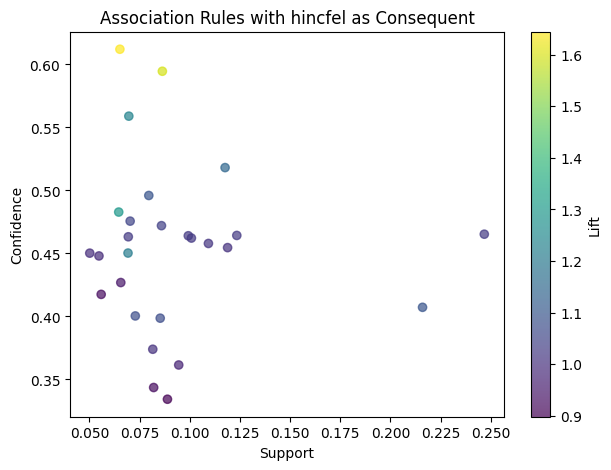

In [18]:
plt.figure(figsize=(7,5))
sc = plt.scatter(
    x=rules_hincfel_only_one["support"],
    y=rules_hincfel_only_one["confidence"],
    c=rules_hincfel_only_one["lift"],
    cmap="viridis",
    alpha=0.7
)
plt.colorbar(sc, label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules with hincfel as Consequent")
plt.show()

A few rules have a high lift (~1.6), meaning they significantly improve predictions of hincfel

Many rules have low to moderate confidence (~0.3-0.5), suggesting the antecedents don’t always predict the consequents reliably.

Higher support values (>0.2) are associated with lower confidence, which is common because high-support rules usually involve more general pattern

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Category = hincfel_Living comfortably on present income, # of rules = 11


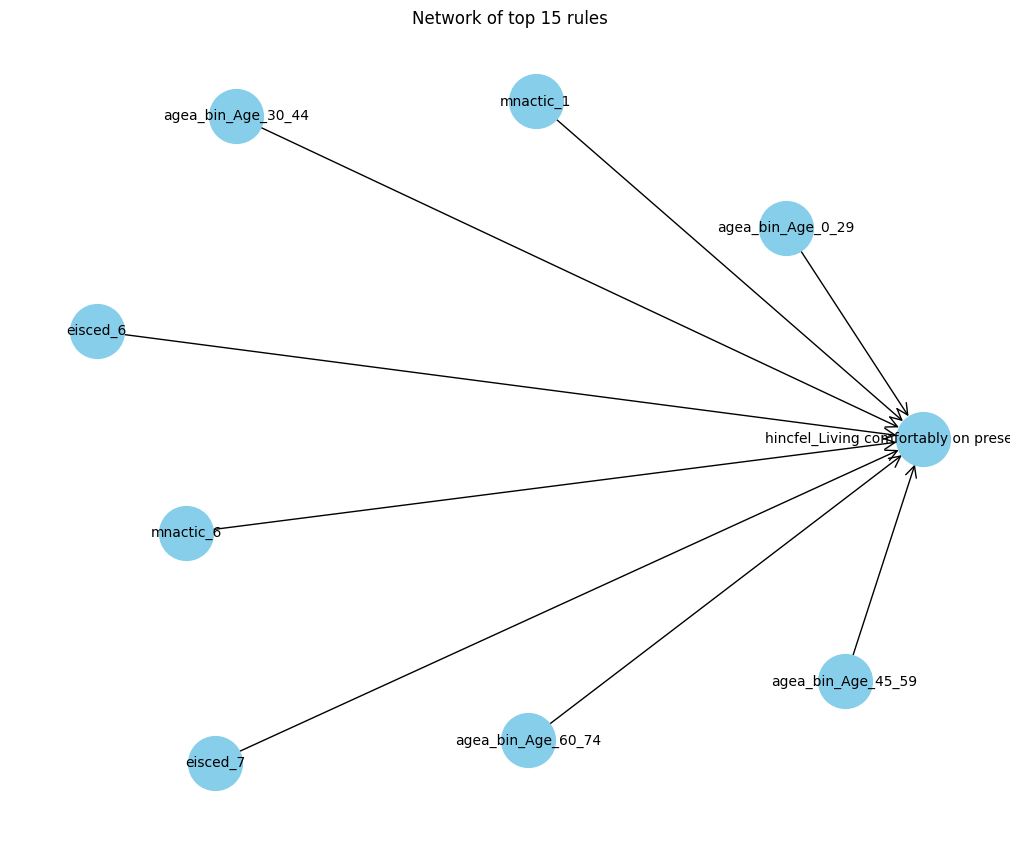


Category = hincfel_Coping on present income, # of rules = 16


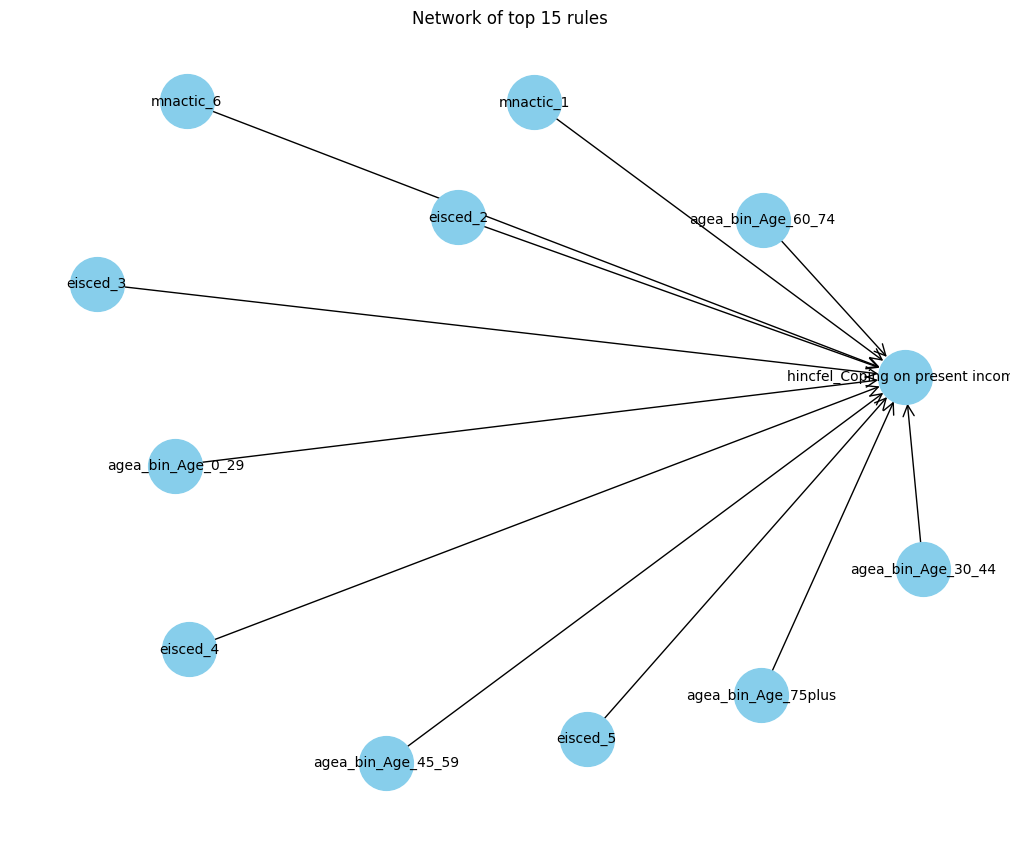


Category = hincfel_Difficult on present income, # of rules = 0
No rules found for this category with current thresholds.

Category = hincfel_Very difficult on present income, # of rules = 0
No rules found for this category with current thresholds.


In [29]:
import networkx as nx  # Import the NetworkX library for graph visualization
import matplotlib.pyplot as plt  # Ensure Matplotlib is also imported


def plot_rule_graph(rules, topN=50):
    """
    Create a directed network of up to topN rules (by lift).
    Each item is a node; edges go from LHS items to RHS items.
    """
    rules_top = rules.sort_values("lift", ascending=False).head(topN)

    G = nx.DiGraph()

    for _, row in rules_top.iterrows():
        lhs = list(row['antecedents'])
        rhs = list(row['consequents'])
        for l_item in lhs:
            for r_item in rhs:
                # Add nodes
                G.add_node(l_item)
                G.add_node(r_item)
                # Add edge with annotation
                G.add_edge(
                    l_item, r_item,
                    lift=row["lift"],
                    confidence=row["confidence"]
                )

    pos = nx.spring_layout(G, k=1.5, seed=42)
    plt.figure(figsize=(10, 8))
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=1500,
        node_color="skyblue",
        arrowsize=20,
        font_size=10,
        arrowstyle="->"
    )
    plt.title(f"Network of top {topN} rules")
    plt.show()

def subset_rules_for_category(rules, category_str):
    """
    Return only those rules whose single-item RHS is exactly 'category_str'.
    Sort by lift descending.
    """
    cat_rules = rules[rules["consequents"].apply(lambda c: category_str in c)]
    return cat_rules.sort_values("lift", ascending=False)

# 1) Define the 4 hincfel categories (as they appear in your dummy columns)
hincfel_categories = [
    "hincfel_Living comfortably on present income",
    "hincfel_Coping on present income",
    "hincfel_Difficult on present income",
    "hincfel_Very difficult on present income"
]

# 2) For each category, filter rules and plot
for cat in hincfel_categories:
    cat_rules = subset_rules_for_category(rules_hincfel_only_one, cat)
    print(f"\nCategory = {cat}, # of rules = {len(cat_rules)}")

    if len(cat_rules) > 0:
        # Plot topN=15 or however many
        plot_rule_graph(cat_rules, topN=15)
    else:
        print("No rules found for this category with current thresholds.")

If multiple rules in the topN differ only in their numeric metrics but have the identical LHS→RHS items, the code is effectively asking NetworkX to draw the same edge multiple times. It just draws it once. That’s why the reported rule count is bigger than the number of displayed edges.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


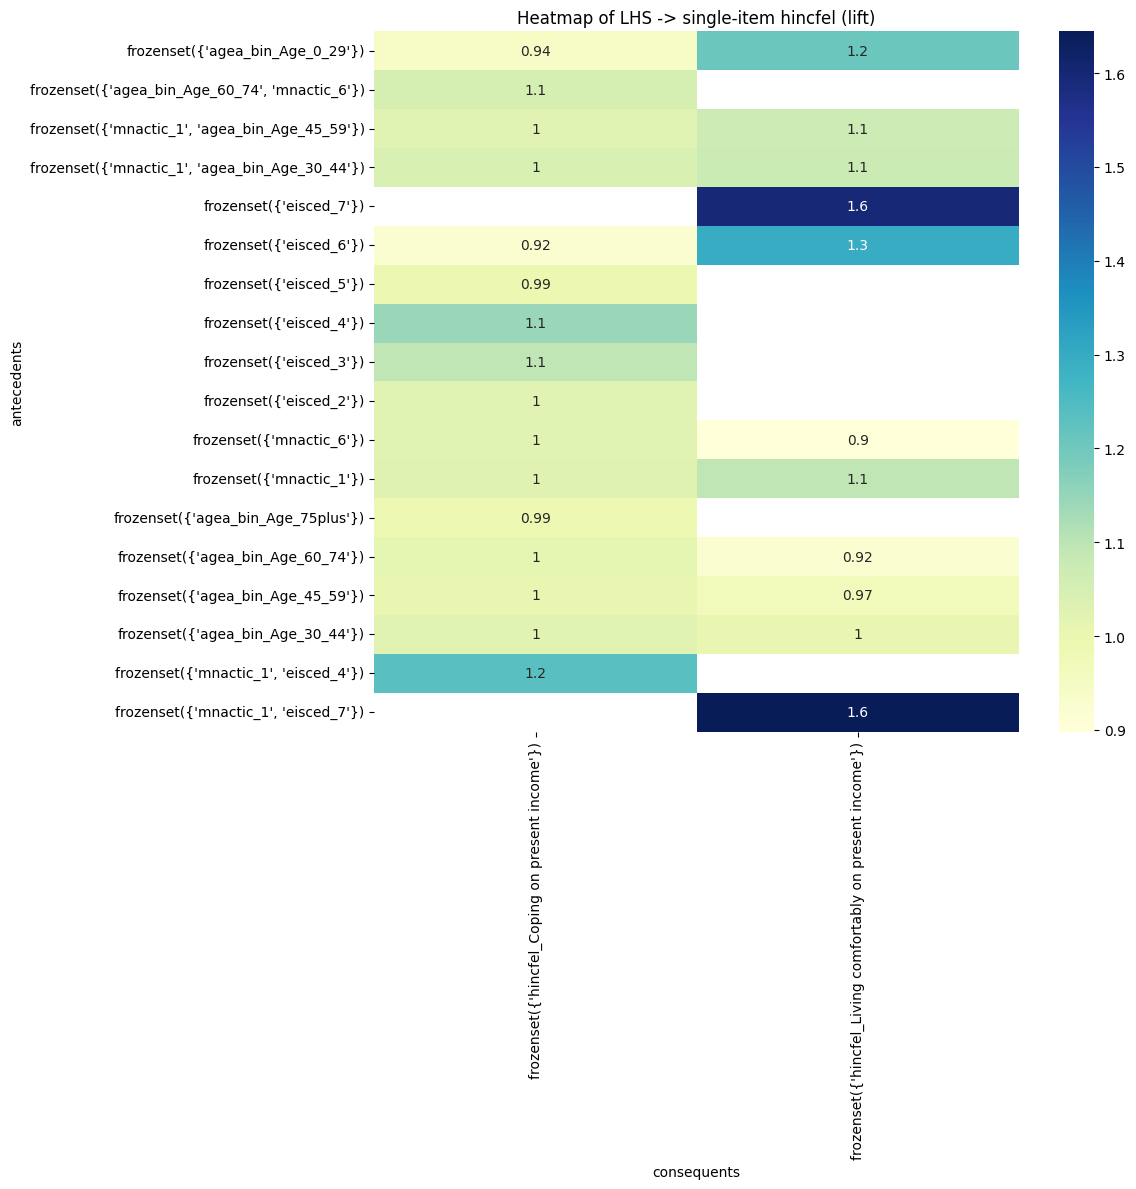

In [22]:
import seaborn as sns  # Import seaborn for heatmap visualization

pivot_data = rules_hincfel_only_one.pivot_table(
    index='antecedents',
    columns='consequents',
    values='lift',
    aggfunc='max'   # or 'mean', whichever you prefer
)

# 2) Plot a heatmap of that pivot
plt.figure(figsize=(12,12))
sns.heatmap(
    pivot_data,
    annot=True,    # shows numeric lift in each cell
    cmap="YlGnBu"  # a nice green-blue colormap
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Heatmap of LHS -> single-item hincfel (lift)")
plt.xlabel("consequents")
plt.ylabel("antecedents")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap above shows 18 antecendents combinations or solo results which lead to specific hincfel categories as consequent. The colour represents the lift value (the darker the colour the higher lift value).

A lift of 1.0 means the antecedent does not provide additional predictive power over random chance. Many values are between 0.9 and 1.2, suggesting only weak to moderate associations.

The combinations of education and main activity (e.g., mnactic_1, eisced_4 → lift = 1.2) show some predictive strength.

Individual age bins (agea_bin_*) have mostly low to moderate lift, meaning age alone is not a strong predictor of financial circumstancies (hincfel).

Strongest predictors: eisced_7 (higher education) and mnactic_1 combined with education levels.
Weak predictors: Age groups (agea_bin_*) and some occupational categories (mnactic_6).

Possible solution in future to mine more rules with higher predictive power also covering remained empty categories of hincfel is to increase sample size, include all entries for each country and calibrate columns which will be added for analysis.
